## Project Documentation (Lab 1)

### Programming language: Python 3.10.7

In [1]:
!python --version

Python 3.10.7


### Task 1.2 implementation:
<br/>
Subtask1 (Triangulation algorithm execution time)
<ol>
    <li>Load samples</li>
    <li>Draw empyrical PDF</li>
    <li>Fit parameters for a suggested distribution (norminvgauss) using Fitter python module</li>
    <li>Draw empyrical & Theoretical PDF</li>
    <li>Evaluate standard error between Empyrical & Theoretical PDF</li>
    <li>Show that the standard error decreases as sample size grows (empirical PDF -> theoretical PDF, n->inf)</li>
</ol>
<br/>
Subtask2 (Normal distribution empirical CDF)
<ol>
    <li>Generate random Norm(mu,sigma) values</li>
    <li>Draw empyrical CDF</li>
    <li>Fit parameters for a suggested distribution (norm) using Fitter python module</li>
    <li>Evaluate standard error between Empyrical & Theoretical CDF</li>
    <li>Show that the standard error decreases as sample size grows (empirical CDF -> theoretical CDF, n->inf)</li>
</ol>

### Subtask1 (Triangulation algorithm execution time)

<b>Data Source:</b>

In [2]:
fname3="sample-data-3.txt"

File: "sample-data-3.txt" - Point set Triangulation algorithm execution time for 100 points (sample size: 10000)<br/>

<b>The data was obtained by executing the below algorithm:</b><br/>
(<b>Triangulation algorithm</b>: https://github.com/al3xkras/ComputationalGeometryCourseProjectKNU)

In [3]:
from random import random,randint
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import time
import pandas as pd
from statistics import mean
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import norminvgauss
from math import sqrt

#### Functions for saving/loading samples into a python array

In [4]:
def saveSamples(samples,location):
    with open(location,"w+") as f:
        for sample in samples:
            f.write(' '.join(map(str,sample))+'\n')

def readSamples(location):
    samples=[]
    with open(location,"r") as f:
        for line in f.readlines():
            samples.append(list(map(float,line.split())))
    return samples

In [5]:
samples=readSamples(fname3)[0]
len(samples)

10000

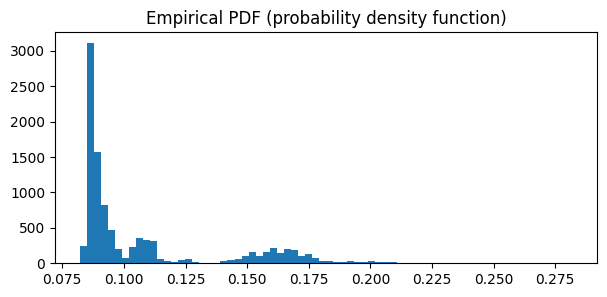

In [6]:
plt.gcf().set_size_inches((7,3))
plt.hist(samples, bins=70)
plt.title("Empirical PDF (probability density function)")
plt.show()

#### Theoretical distribution (suggested by Fitter): norminvgauss

Normal inverse Gauss distribution parameters are calculated below

Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.11s/it]


(2.469494132931309, 2.46282262681328, 0.08435554713051517, 0.0017098074789276005)


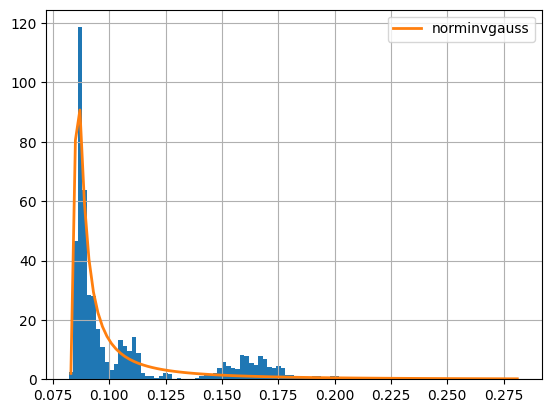

In [7]:
f = Fitter(samples,distributions= ["norminvgauss"])
f.fit()
f.summary()
params=f.fitted_param["norminvgauss"]
print(params)

### Plotting the Normal inverse Gauss distribution PDF (theoretical PDF)

fitted parameters: (2.469494132931309, 2.46282262681328, 0.08435554713051517, 0.0017098074789276005)


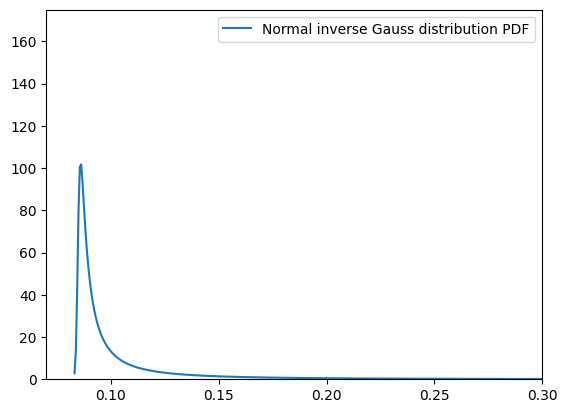

In [8]:
params=f.fitted_param['norminvgauss']
    
x = np.linspace(norminvgauss.ppf(0.001, *params),
                norminvgauss.ppf(0.999, *params),1000)
pdf = norminvgauss.pdf(x,*params)

plt.plot(x,pdf,label="Normal inverse Gauss distribution PDF")
plt.ylim(0,175)
plt.xlim(0.07,0.3)
plt.legend()
print("fitted parameters:",params)
plt.show()

<h3>Calculating the standard error between theoretical & empirical PDF</h3>
</br>Depending on sample size

params = (2.469494132931309, 2.46282262681328, 0.08435554713051517, 0.0017098074789276005)
standard error for sample size = 100 : 2.936967
standard error for sample size = 200 : 2.786324
standard error for sample size = 500 : 2.873238
standard error for sample size = 2000 : 2.719200
standard error for sample size = 5000 : 2.296527
standard error for sample size = 7000 : 2.199454
standard error for sample size = 10000 : 2.188392


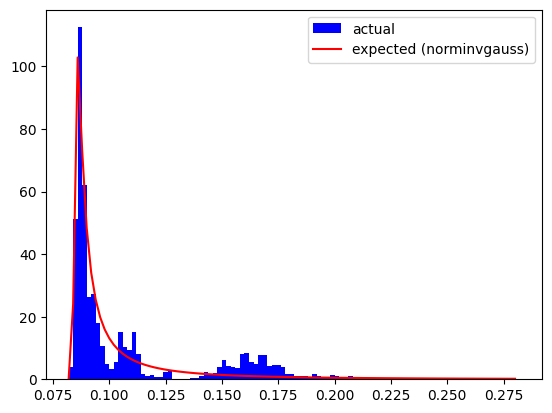

In [9]:
def err(samples,dist,params):
    print("params =",params)
    iarr=[100,200,500,2000,5000,7000,10000]

    rep=10
    results=[0]*len(iarr)
    for r in range(rep):
        for _i in range(len(iarr)):
            i=iarr[_i]
            samp=np.random.choice(samples,i)
            samp.sort()

            bins=100
            plt.cla()
            actual,_samp = plt.hist(samp,bins=bins,color="blue",density=True,label="actual")[:2]

            expected=[dist.pdf(a,*params) for a in _samp[:-1]]

            plt.plot(_samp[:-1],expected,color="red",label="expected ("+str(dist.name)+")")

            diff = np.array([abs(actual[i]-expected[i]) for i in range(bins)])
            serr=sqrt(diff.std())
            results[_i]+=serr

    results=[r/rep for r in results]


    for i in range(len(iarr)):
        print("standard error for sample size = %d : %.6f"%(iarr[i],results[i]))

    plt.legend()
    plt.show()

err(samples,norminvgauss,params)

### Subtask2 (Normal distribution empirical CDF)

<b>Data Source:</b> randomly generated values for Normal distribution with parameters:
- mu = 1.5
- sigma = 4

<b>Parameters for a Theoretical CDF are fitted below</b>
<br/>Assuming the theoretical distribution is <b>Norm(mu,sigma)</b>

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.04it/s]


(mu,sigma) ~= (1.4878481922355975, 3.991137187922275)


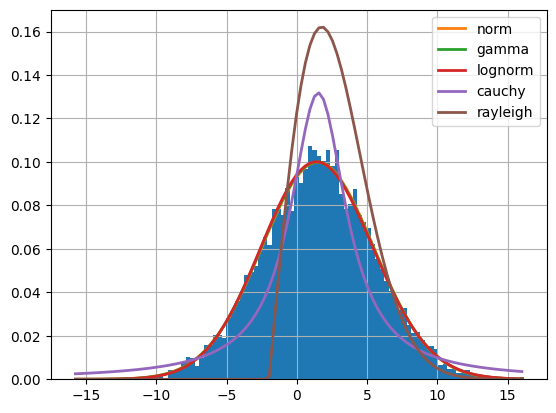

In [10]:
from scipy.stats import norm
mu=1.5
sigma=4
samples1=norm.rvs(mu,sigma,10000)


f1 = Fitter(samples1,distributions=get_common_distributions())
f1.fit()
f1.summary()
params1=f1.fitted_param["norm"]
print("(mu,sigma) ~=",params1)

In [11]:
def drawEmpyricalCDF(ax,_samples,label):
    mean=_samples.mean()
    var=np.array([x**2 for x in _samples]).mean()-mean**2
    samples=np.sort(_samples)
    
    n=len(samples)
    seg0=samples[0]
    seg1=None
    X=[]
    Y=[]
    i0=0
    diff=0
    for i in range(len(samples)-1):
        seg1=samples[i+1]
        diff+=1
        if abs(seg1-seg0)>0.1:
            X.append(seg0)
            X.append(seg1)
            Y.append((i0+diff)/n)
            Y.append((i0+diff)/n)
            seg0=samples[i+1]
            seg1=None
            i0=i
            diff=0
          
    ax.plot(X,Y,"b",label=label)

def err_cdf(samples,dist,params):
    print("params =",params)
    iarr=[100,200,500,2000,3000,5000,7000,10000]

    rep=10
    results=[0]*len(iarr)
    fig,axes=plt.subplots(4,2, figsize=(15,14))
    for r in range(rep):
        for _i in range(len(iarr)):
            ax=None
            if (_i>=4):
                ax=axes[_i-4,1]
            else:
                ax=axes[_i,0]
            i=iarr[_i]
            samp=np.random.choice(samples,i)
            samp.sort()

            bins=100
            
            
            actual,_samp = ax.hist(samp,bins=bins,color="blue",density=True,label="actual")[:2]
            ax.cla()
            drawEmpyricalCDF(ax,samp,"actual")

            expected=[dist.pdf(a,*params) for a in _samp[:-1]]

            ax.plot(_samp[:-1],[dist.cdf(a,*params) for a in _samp[:-1]],color="red",label="expected ("+str(dist.name)+")")

            diff = np.array([abs(actual[i]-expected[i]) for i in range(bins)])
            serr=sqrt(diff.std())
            results[_i]+=serr
            if (r==rep-1):
                ax.set_title("sample size = %d"%i)
                ax.legend()
    
    plt.show()
    results=[r/rep for r in results]

    plt.close()
    for i in range(len(iarr)):
        print("standard error for sample size = %d : %.6f"%(iarr[i],results[i]))


### Empyrical & Theoretical CDF

params = (1.4878481922355975, 3.991137187922275)


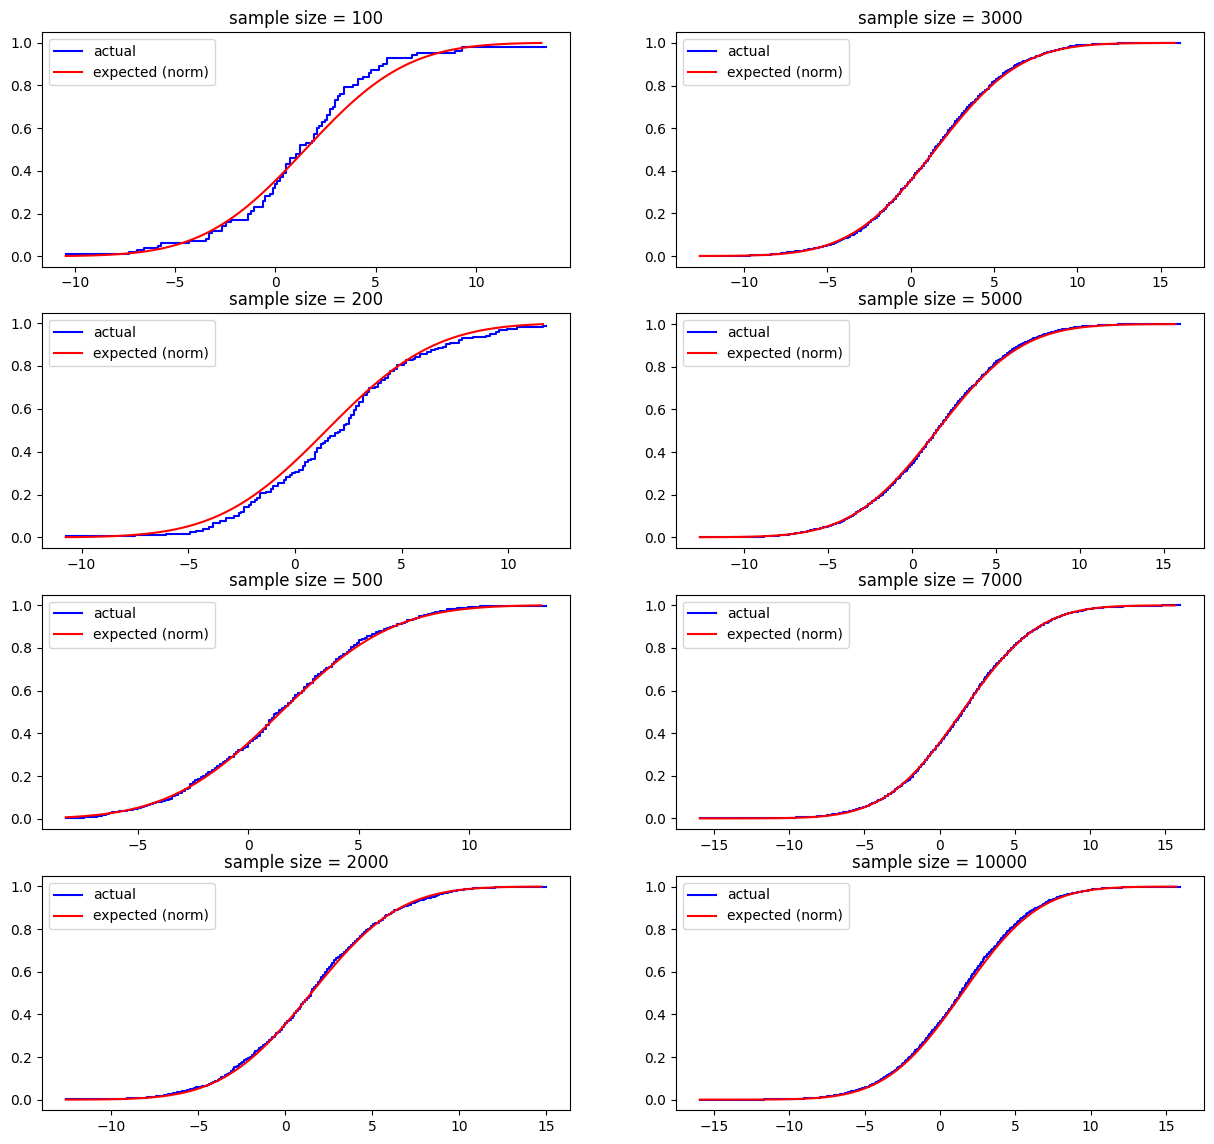

standard error for sample size = 100 : 0.181729
standard error for sample size = 200 : 0.142957
standard error for sample size = 500 : 0.116225
standard error for sample size = 2000 : 0.081136
standard error for sample size = 3000 : 0.072819
standard error for sample size = 5000 : 0.063650
standard error for sample size = 7000 : 0.061628
standard error for sample size = 10000 : 0.058527


In [12]:
err_cdf(samples1,norm,params1)